In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [69]:
loan_data = pd.read_csv('/content/LoanDataset.csv')

In [70]:
loan_data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [71]:
# getting the rows and columns of dataset
loan_data.shape

(32586, 13)

In [72]:
# getting the missing values in dataset
loan_data.isnull().sum()

,0
customer_id,3
customer_age,0
customer_income,0
home_ownership,0
employment_duration,895
loan_intent,0
loan_grade,0
loan_amnt,1
loan_int_rate,3116
term_years,0


In [73]:
# filling the missing values in dataset
loan_data['customer_id'].fillna(loan_data['customer_id'].mean(),inplace=True)
loan_data['employment_duration'].fillna(loan_data['employment_duration'].mean(),inplace=True)
loan_data['loan_int_rate'].fillna(loan_data['loan_int_rate'].mean(),inplace=True)
loan_data['historical_default'].fillna(loan_data['historical_default'].mode()[0],inplace=True)
loan_data['Current_loan_status'].fillna(loan_data['Current_loan_status'].mode()[0],inplace=True)
loan_data['loan_amnt'].fillna(loan_data['loan_amnt'].mode()[0],inplace=True)

/tmp/ipython-input-797230801.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['customer_id'].fillna(loan_data['customer_id'].mean(),inplace=True)
/tmp/ipython-input-797230801.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [74]:
# once again checking and counting the missing values
loan_data.isnull().sum()

,0
customer_id,0
customer_age,0
customer_income,0
home_ownership,0
employment_duration,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
term_years,0


In [75]:
# getting the some information of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32586 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  32586 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32586 non-null  object 
 8   loan_int_rate        32586 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   32586 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32586 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [76]:
# getting the statistical measures of dataset
loan_data.describe()

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32586.000000,32586.000000,32586.000000,32586.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.486631,6.360528,4.085456,3.081611,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8145.250000,23.000000,2.000000,8.490000,3.000000,3.000000
50%,16289.248903,26.000000,4.000000,11.011553,4.000000,4.000000
75%,24432.750000,30.000000,7.000000,13.110000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [77]:
# Encoding the categorical values
encoder = LabelEncoder()

In [78]:
cat_col = ['customer_income','home_ownership','loan_intent','loan_grade','loan_amnt','historical_default','Current_loan_status']

In [79]:
for col in cat_col:
  loan_data[col] = encoder.fit_transform(loan_data[col])

In [80]:
loan_data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,2955,3,123.0,4,2,516,16.02,10,1,3,0
1,2.0,21,4211,2,5.0,1,0,1,11.14,1,1,2,1
2,3.0,25,4211,0,1.0,3,1,576,12.87,5,0,3,0
3,4.0,23,3263,3,4.0,3,1,516,15.23,10,0,2,0
4,5.0,24,2691,3,8.0,3,1,516,14.27,10,1,4,0


In [81]:
q1 = loan_data['employment_duration'].quantile(0.25)
q3 = loan_data['employment_duration'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

loan_data = loan_data[
    (loan_data['employment_duration'] >= lower) &
    (loan_data['employment_duration'] <= upper)
]


In [82]:
loan_data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
1,2.0,21,4211,2,5.0,1,0,1,11.14,1,1,2,1
2,3.0,25,4211,0,1.0,3,1,576,12.87,5,0,3,0
3,4.0,23,3263,3,4.0,3,1,516,15.23,10,0,2,0
4,5.0,24,2691,3,8.0,3,1,516,14.27,10,1,4,0
5,6.0,21,4277,2,2.0,5,0,339,7.14,1,0,2,0


In [83]:
loan_data['Current_loan_status'].value_counts()

,count
Current_loan_status,
1,25017
0,6715


1  --- > Approved

0  ----> Rejected

In [84]:
# Separating the features and target of dataset
features = loan_data.drop(columns=['Current_loan_status','loan_amnt'],axis=1)
target = loan_data['Current_loan_status']

In [85]:
# Splitting the features and target of dataset
x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2,random_state=42)

In [86]:
print(x_train.shape,y_train.shape)

(25385, 11) (25385,)


In [87]:
# Scalling the features
scaler = StandardScaler()

In [88]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [89]:
# training the logistic regression
model_log = LogisticRegression()

In [90]:
model_log.fit(x_train_std,y_train)

LogisticRegression()

In [91]:
# evaluating the testing data
x_train_prediction_log = model_log.predict(x_train_std)
x_test_prediction_log = model_log.predict(x_test_std)

In [92]:
print('Accuracy Score on training data:',accuracy_score(x_train_prediction_log,y_train))
print('Accuracy Score on testing data:',accuracy_score(x_test_prediction_log,y_test))

Accuracy Score on training data: 0.9216860350600748
Accuracy Score on testing data: 0.9253190483693083


In [93]:
print('Accuracy Score on training data:',classification_report(x_train_prediction_log,y_train))
print('Accuracy Score on testing data:',classification_report(x_test_prediction_log,y_test))

Accuracy Score on training data:               precision    recall  f1-score   support

           0       0.74      0.87      0.80      4547
           1       0.97      0.93      0.95     20838

    accuracy                           0.92     25385
   macro avg       0.85      0.90      0.88     25385
weighted avg       0.93      0.92      0.92     25385

Accuracy Score on testing data:               precision    recall  f1-score   support

           0       0.75      0.88      0.81      1168
           1       0.97      0.94      0.95      5179

    accuracy                           0.93      6347
   macro avg       0.86      0.91      0.88      6347
weighted avg       0.93      0.93      0.93      6347



In [94]:
cm = confusion_matrix(y_test,x_test_prediction_log)
print('Confusion Matrix:',cm)

Confusion Matrix: [[1030  336]
 [ 138 4843]]


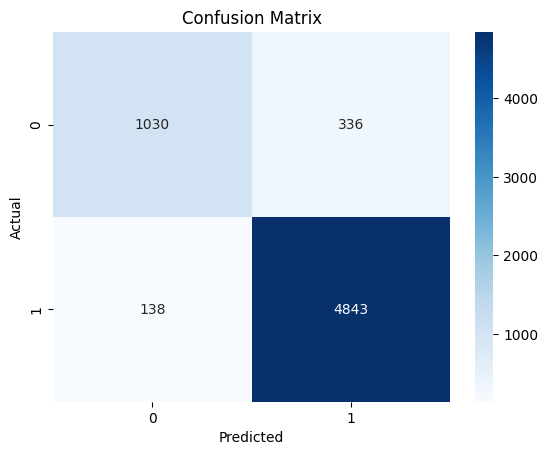

In [95]:
# Visualizing the confusion matrix
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [110]:
x_test_proba = model_log.predict_proba(x_test_std)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, x_test_proba)

In [100]:
# training the RandomForest classifier model
model_rf = RandomForestClassifier(n_estimators=200,random_state=42)

In [101]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [102]:
# evaluating the testing data
x_train_prediction_rf = model_rf.predict(x_train_std)
x_test_prediction_rf = model_rf.predict(x_test_std)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [103]:
print('Accuracy Score on training data:',classification_report(x_train_prediction_rf,y_train))
print('Accuracy Score on testing data:',classification_report(x_test_prediction_rf,y_test))

Accuracy Score on training data:               precision    recall  f1-score   support

           0       1.00      0.21      0.35     25385
           1       0.00      0.00      0.00         0

    accuracy                           0.21     25385
   macro avg       0.50      0.11      0.17     25385
weighted avg       1.00      0.21      0.35     25385

Accuracy Score on testing data:               precision    recall  f1-score   support

           0       1.00      0.22      0.35      6347
           1       0.00      0.00      0.00         0

    accuracy                           0.22      6347
   macro avg       0.50      0.11      0.18      6347
weighted avg       1.00      0.22      0.35      6347



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

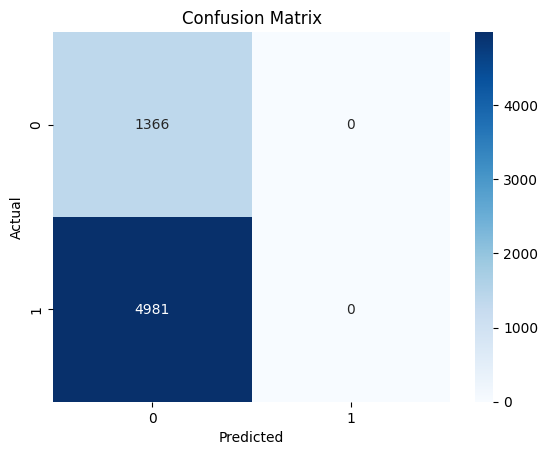

In [104]:
# visualizing the confusion matrix
cm = confusion_matrix(y_test,x_test_prediction_rf)

sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [111]:
x_test_rf_proba = model_rf.predict_proba(x_test_std)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, x_test_rf_proba)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ROC Curve

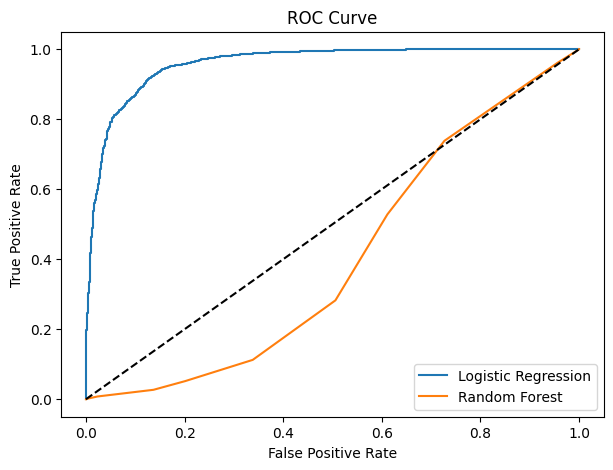

In [112]:
plt.figure(figsize=(7,5))

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

plt.plot([0,1], [0,1], 'k--')  # random classifier line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [117]:
# making prediction
input_data = [[2,21,9600,2,5,1,1,11.14,1,1,2]]
prediction_std = model_log.predict(scaler.transform(input_data))
if prediction_std[0] == 0:
  print('Loan has Rejected')
else:
  print('Loan has successfully Approved')

Loan has successfully Approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
